<a href="https://colab.research.google.com/github/fajni/ELFAK-TiMAP/blob/main/Naive%20Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes

Naivna Bajesova metoda

Podaci o glukozi (_glucose_) i krvnom pritisku (_blood pressure_) za klasifikaciju da li pacijent ima dijabetes ili ne.



---



In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

import seaborn as sns
from sklearn.metrics import confusion_matrix



---



## Podaci

Prikaz podataka:

In [56]:
# Učitavanje skupa podataka. Poslednja kolona "diabetes" predstavlja labelu
# klase i označava da li je pacijent ima dijabetes ili ne

try:
  !wget https://raw.githubusercontent.com/fajni/ELFAK-TiMAP/refs/heads/main/Data/Diabetes/diabetes.csv -O diabetes.csv
except:
  print("An exception occurred")

data = pd.read_csv("diabetes.csv")

data

--2025-07-04 09:07:06--  https://raw.githubusercontent.com/fajni/ELFAK-TiMAP/refs/heads/main/Data/Diabetes/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7993 (7.8K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]   7.81K  --.-KB/s    in 0.001s  

2025-07-04 09:07:06 (12.0 MB/s) - ‘diabetes.csv’ saved [7993/7993]



,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1


Podela podataka:

In [57]:
# U matricu X se smeštaju numerički atributi "glucose" i "bloodpressure", a
# u vektor y se smeštaju labele klasa.
X = data.iloc[:, [0, 1]].values
Y = data.iloc[:, 2].values

print(X)
print(Y)

[[40 85]
 [40 92]
 [45 63]
 ...
 [40 83]
 [40 60]
 [45 82]]
[0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0
 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0
 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0
 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0
 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0
 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1
 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1
 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0



---



## Skup za treniranje i testiranje

In [58]:
# Podela skupa podataka na trening (75%) i test deo (25%).
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)



---



Skaliranje podataka

In [59]:
# Skaliranje podataka nije neophodno za rad Naive Bayes algoritma.
# Radi se zbog kasnijeg grafičkog prikaza podataka.
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



---



# Kreiranje i obucavanje modela

In [60]:
# Za rad sa realnim numeričkim atributima se koristi GaussianNB varijanta.
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

classifier

GaussianNB()



---



### Predikcija

In [61]:
# Predikcija klase za objekte iz test skupa podataka.
Y_pred = classifier.predict(X_test)



---



## Matrica konfuzije

Matrica konfuzije

|      |      |
| ---- | ---- |
|  TP  |  FN  |
|  FP  |  TN  |

TP: Model je pravilno predvideo da je primer pozitivan

TN: Model je pravilno predvideo da je primer negativan

FP: Model je predvideo pozitivno, ali je stvarno negativno (lažno pozitivan)

FN: Model je predvideo negativno, ali je stvarno pozitivno (lažno negativan)

In [62]:
# Prikazuje se matrica konfuzije
cm = confusion_matrix(Y_test, Y_pred)

print("Matrica konfuzije")
print(cm)

Matrica konfuzije
[[ 98   6]
 [ 13 132]]


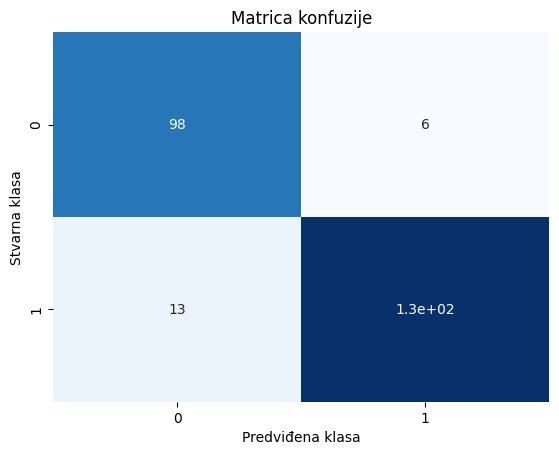

In [63]:
class_names=[0,1]
matrix = confusion_matrix(Y_test, Y_pred)

# Kreiranje DataFrame objekta za prikaz.
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# Iscrtavanje heatmap-e.
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Matrica konfuzije")
plt.ylabel("Stvarna klasa")
plt.xlabel("Predviđena klasa")
plt.show()



---



In [64]:
# Prikazuju se izvedene mere - preciznost, odziv, F-mera
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       104
           1       0.96      0.91      0.93       145

    accuracy                           0.92       249
   macro avg       0.92      0.93      0.92       249
weighted avg       0.93      0.92      0.92       249





---



## Vizuelizacija

In [65]:
# Prikaz predviđenih i stvarnih vrednosti klase
# Od 2 vektora koordinata kreiraju se 2 matrice koordinata.
X1, X2 = np.meshgrid(np.arange(start = X_test[:, 0].min() - 1, stop = X_test[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_test[:, 1].min() - 1, stop = X_test[:, 1].max() + 1, step = 0.01))

In [66]:
# Matrica predikcija. Prvo se matrice atributa X1 i X2 preoblikuju u nizove,
# transponuju se, izvrši se predikcija. Zatim se rezultati iz vektora preoblikuju
# u matricu.
Y_pred_diag = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

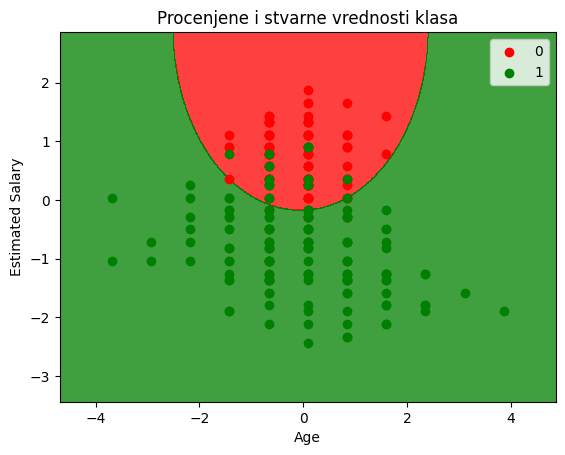

In [68]:
# Iscrtavanje konturnog dijagrama.
plt.contourf(X1, X2, Y_pred_diag, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.scatter(X_test[Y_test == 0, 0], X_test[Y_test == 0, 1], c = 'red', label = 0)
plt.scatter(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], c = 'green', label = 1)
plt.title('Procenjene i stvarne vrednosti klasa')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()